In [13]:
import pandas as pd
df = pd.read_csv('https://bit.ly/fish_csv_data')
df.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [14]:
fish_data = df[['Weight','Length','Diagonal','Height','Width']].to_numpy()
fish_target = df['Species'].to_numpy()

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(
    fish_data, fish_target, test_size=0.2, random_state=42
)

In [17]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)

train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [18]:
from sklearn.linear_model import SGDClassifier

In [19]:
sc = SGDClassifier(loss='log_loss', n_jobs=-1) # 로지스틱 손실 함수 - binary crossentropy, categorical, crossentropy

In [20]:
sc.fit(train_scaled, train_target)

,loss,'log_loss'
,penalty,'l2'
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,1000
,tol,0.001
,shuffle,True
,verbose,0
,epsilon,0.1
,n_jobs,-1


In [23]:
print("훈련세트:", sc.score(train_scaled, train_target))
print("테스트세트:", sc.score(test_scaled,test_target))

훈련세트: 0.8818897637795275
테스트세트: 0.90625


In [24]:
sc.partial_fit(train_scaled, train_target)

,loss,'log_loss'
,penalty,'l2'
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,1000
,tol,0.001
,shuffle,True
,verbose,0
,epsilon,0.1
,n_jobs,-1


In [25]:
print("훈련세트:", sc.score(train_scaled, train_target))
print("테스트세트:", sc.score(test_scaled,test_target))

훈련세트: 0.9133858267716536
테스트세트: 0.90625


In [26]:
sc.predict(test_scaled)

array(['Perch', 'Smelt', 'Pike', 'Perch', 'Perch', 'Bream', 'Smelt',
       'Roach', 'Perch', 'Pike', 'Bream', 'Perch', 'Bream', 'Parkki',
       'Bream', 'Bream', 'Perch', 'Perch', 'Perch', 'Bream', 'Smelt',
       'Bream', 'Bream', 'Bream', 'Bream', 'Perch', 'Perch', 'Perch',
       'Smelt', 'Smelt', 'Pike', 'Perch'], dtype='<U9')

In [64]:
import numpy as np
np.round(sc.predict_proba(test_scaled[:5]), decimals=3)

array([[0.   , 0.016, 0.87 , 0.   , 0.106, 0.   , 0.008],
       [0.   , 0.011, 0.042, 0.001, 0.015, 0.931, 0.   ],
       [0.   , 0.   , 0.021, 0.821, 0.021, 0.135, 0.001],
       [0.   , 0.001, 0.571, 0.002, 0.366, 0.   , 0.06 ],
       [0.   , 0.   , 0.773, 0.004, 0.211, 0.   , 0.012]])

In [65]:
sc = SGDClassifier(max_iter=1, tol=None, loss='log_loss')
sc.fit(train_scaled, train_target)

,loss,'log_loss'
,penalty,'l2'
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,1
,tol,None
,shuffle,True
,verbose,0
,epsilon,0.1
,n_jobs,None


In [66]:
train_score = []
test_score = []
train_score.append(sc.score(train_scaled, train_target)) # 훈련 세트 정확도
test_score.append(sc.score(test_scaled, test_target)) # 테스트 세트 정확도

for _ in range(599):
    sc.partial_fit(train_scaled, train_target)
    train_score.append(sc.score(train_scaled, train_target)) # 훈련 세트 정확도
    test_score.append(sc.score(test_scaled, test_target)) # 테스트 세트 정확도
    

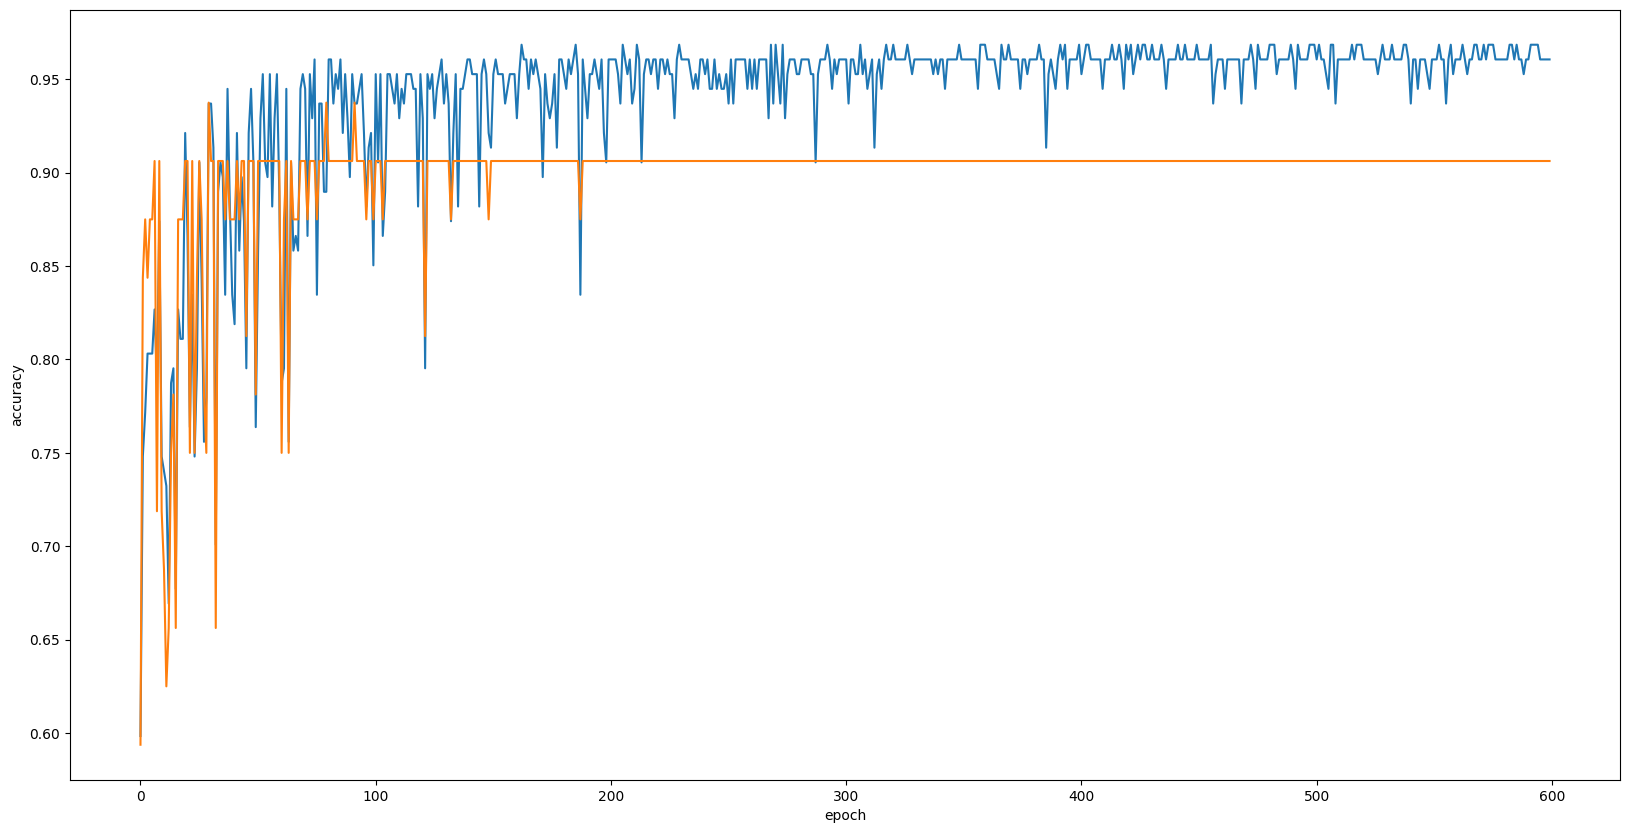

In [67]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plt.plot(train_score)
plt.plot(test_score)
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.show()

In [68]:
sc = SGDClassifier(loss='log_loss', max_iter=100, tol=None)
sc.fit(train_scaled, train_target)

,loss,'log_loss'
,penalty,'l2'
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,100
,tol,None
,shuffle,True
,verbose,0
,epsilon,0.1
,n_jobs,None


In [69]:
print("훈련세트:", sc.score(train_scaled, train_target))
print("테스트세트:", sc.score(test_scaled, test_target))

훈련세트: 0.9212598425196851
테스트세트: 0.90625


In [70]:
# GridSearchCV를 통한 최적의 하이퍼파라미터와 최적의 모델을 검색
from sklearn.model_selection import GridSearchCV
params = {
    'max_iter': np.arange(50, 1000),
    'tol': np.arange(0.0001,1,0.0001),
    'alpha': [0.0001,0.001,0.01,0.1,1,10,100]
}

sc = SGDClassifier(loss='log_loss')
gs = GridSearchCV(sc, params, n_jobs=-1)

In [71]:
gs.fit(train_scaled,train_target)

c:\Users\admin\Desktop\jyh\ai_class_source\09 핀테크 머신러닝과 딥러닝 이해\source\.venv\Lib\site-packages\sklearn\model_selection\_split.py:811: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


KeyboardInterrupt: 

In [85]:
# RandomizedSearchCV
from scipy.stats import randint, uniform
from sklearn.model_selection import RandomizedSearchCV
params= {
    'max_iter': randint(50, 1000),
    'tol': uniform(0.001,1),
    'alpha': uniform(0.001, 100)
}

In [86]:
sc = SGDClassifier(loss='log_loss')
rs = RandomizedSearchCV(sc, params, n_iter=2500, n_jobs=-1, random_state=42)

In [87]:
rs.fit(train_scaled, train_target)

c:\Users\admin\Desktop\jyh\ai_class_source\09 핀테크 머신러닝과 딥러닝 이해\source\.venv\Lib\site-packages\sklearn\model_selection\_split.py:811: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


,estimator,SGDClassifier(loss='log_loss')
,param_distributions,"{'alpha': <scipy.stats....002188B159670>, 'max_iter': <scipy.stats....002188B195100>, 'tol': <scipy.stats....002188B2EBB60>}"
,n_iter,2500
,scoring,None
,n_jobs,-1
,refit,True
,cv,None
,verbose,0
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


In [88]:
rs.best_params_

{'alpha': np.float64(0.019839955658189745),
 'max_iter': 492,
 'tol': np.float64(0.11198946921348107)}

In [89]:
model = rs.best_estimator_
model

,loss,'log_loss'
,penalty,'l2'
,alpha,np.float64(0....9955658189745)
,l1_ratio,0.15
,fit_intercept,True
,max_iter,492
,tol,np.float64(0....8946921348107)
,shuffle,True
,verbose,0
,epsilon,0.1
,n_jobs,None


In [90]:
print("학습세트:",model.score(train_scaled, train_target))
print("테스트세트:",model.score(test_scaled,test_target))

학습세트: 0.7322834645669292
테스트세트: 0.84375


In [94]:
# 5-fold 검증 값 cv_results_
np.mean(rs.cv_results_['mean_test_score'])

np.float64(0.3179100307692308)